## Importing external packages

In [26]:
#SampurnaM
import MDAnalysis as mda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nglview as nv
import prolif as plf
## specific function imports:
#distance
from MDAnalysis.analysis import contacts
#creating dataframe from indices and parsing lists into dictionary
from collections import Counter
## for RSA calculation using DSSP
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
from pathlib import Path # get pdb file name without extension

## Running analysis on Molecular Dynamics (MD) simulation trajectories and generating plots

#### loading simulation trajectory files and creating MDAnalysis universe

In [ ]:
a1101_repli1_u = mda.Universe("a1101_md.tpr","a1101_repli1_shortened_pbc_ok.xtc")
a1101_repli2_u = mda.Universe("a1101_md.tpr","a1101_repli2_shortened_pbc_ok.xtc") 
a1101_repli3_u = mda.Universe("a1101_md.tpr","a1101_repli3_shortened_pbc_ok.xtc")

## 1D- RMSD 

In [12]:
from MDAnalysis.analysis import rms

In [13]:
hla_epitope_residues = 'backbone and (resid 15:20 or resid 40:41 or resid 91 or resid 311 or resid 313 or resid 322)'

In [ ]:
#replicate 1

In [ ]:
R1 = rms.RMSD(a1101_repli1u,  # universe to align
             a1101_repli1u,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
             groupselections=[hla_epitope_residues],  # groups for RMSD
             ref_frame=0)  # frame index of the reference
R1.run()

In [ ]:
R1.results.rmsd.shape

In [ ]:
#replicate 2

In [ ]:
R2 = rms.RMSD(a1101_repli2u,  # universe to align
             a1101_repli2u,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
             groupselections=[hla_epitope_residues],  # groups for RMSD
             ref_frame=0)  # frame index of the reference
R2.run()

In [ ]:
R2.results.rmsd.shape

In [ ]:
#replicate 3

In [ ]:
R3 = rms.RMSD(a1101_repli3u,  # universe to align
             a1101_repli3u,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
             groupselections=[hla_epitope_residues],  # groups for RMSD
             ref_frame=0)  # frame index of the reference
R3.run()

In [ ]:
R3.results.rmsd.shape

### converting 1D-RMSD results to df for plotting and saving df to csv

In [ ]:
a1101_repli1_rmsddf = pd.DataFrame(R1.results.rmsd,
                  columns=['Frame', 'Time (ns)',
                           'Backbone','hla_epitope_residues' ])
a1101_repli2_rmsddf = pd.DataFrame(R2.results.rmsd,
                  columns=['Frame', 'Time (ns)',
                           'Backbone', 'hla_epitope_residues'])
a1101_repli3_rmsddf = pd.DataFrame(R3.results.rmsd,
                  columns=['Frame', 'Time (ns)',
                           'Backbone', 'hla_epitope_residues'])
####saving to csv
a1101_repli1_rmsddf.to_csv("a1101_repli1_rmsddf.csv")
a1101_repli2_rmsddf.to_csv("a1101_repli2_rmsddf.csv")
a1101_repli3_rmsddf.to_csv("a1101_repli3_rmsddf.csv")

In [14]:
#### Reading from csv
a1101_repli1_rmsddf =pd.read_csv("a1101_repli1_rmsddf.csv")
a1101_repli2_rmsddf =pd.read_csv("a1101_repli2_rmsddf.csv")
a1101_repli3_rmsddf= pd.read_csv("a1101_repli3_rmsddf.csv")

In [15]:
a1101_repli1_rmsddf.head(3)

Unnamed: 0  Frame  Time (ns)  Backbone  hla_epitope_residues
0           0    0.0        0.0  0.000002              0.000000
1           1    1.0      100.0  0.260308              0.292463
2           2    2.0      200.0  0.260780              0.292626

### Plotting 1D-RMSD results

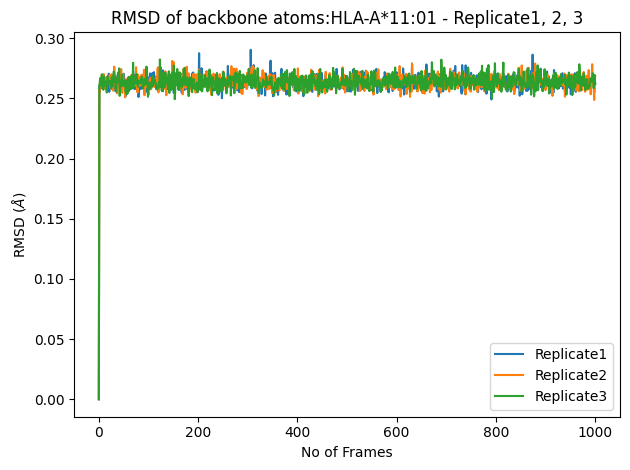

In [16]:
#fig,axes = plt.subplot(figsize = (15,15))
axes = plt.plot(a1101_repli1_rmsddf.Frame , a1101_repli1_rmsddf.Backbone, label = "Replicate1")
axes = plt.plot(a1101_repli1_rmsddf.Frame , a1101_repli2_rmsddf.Backbone, label = "Replicate2")
axes = plt.plot(a1101_repli1_rmsddf.Frame , a1101_repli3_rmsddf.Backbone, label = "Replicate3")
#https://stackoverflow.com/questions/70937689/plotting-multiple-line-graphs-in-matplotlib
plt.ylabel(r'RMSD ($\AA$)')
#set xlabel
plt.xlabel(r'No of Frames')
#setting titleand
plt.title('RMSD of backbone atoms:HLA-A*11:01 - Replicate1, 2, 3')
# Adjust layout
plt.tight_layout()
plt.legend()
# Adjust the legend position using bbox_to_anchor
## Save the plot to a file (adjust the filename and format as needed)
plt.savefig('RMSD1D_backbone_hla_a1101_three_replicates.png')
# Show the plot
plt.show()

## RMSF analysis
https://userguide.mdanalysis.org/stable/examples/analysis/alignment_and_rms/rmsf.html

from MDAnalysis.analysis import rms, align

#### Generating average structures for each trajectory

In [ ]:
average = align.AverageStructure(a1101_repli1u, a1101_repli1u, select='protein and name CA',
                                 ref_frame=0).run()
ref_a1101_repli1= average.results.universe

In [ ]:
average2 = align.AverageStructure(a1101_repli2u, a1101_repli2u, select='protein and name CA',
                                 ref_frame=0).run()
ref_a1101_repli2= average2.results.universe

In [ ]:
average3 = align.AverageStructure(a1101_repli3u, a1101_repli3u, select='protein and name CA',
                                 ref_frame=0).run()
ref_a1101_repli3= average3.results.universe

#### Aligning each trajectory to the average structure to compute RMSF

In [ ]:
aligner = align.AlignTraj(a1101_repli1u, ref_a1101_repli1,
                          select='protein and name CA',
                           filename="protein_andca_first_frame_align_forRMSF.xtc",
                          in_memory=False).run()

In [ ]:
aligner2 = align.AlignTraj(a1101_repli3u, ref_a1101_repli2,
                          select='protein and name CA',
                           filename="protein_andca_first_frame_align_forRMSF_a1101_repli2.xtc",
                          in_memory=False).run(verbose = True)

In [ ]:
aligner3 = align.AlignTraj(a1101_repli3u, ref_a1101_repli3,
                          select='protein and name CA',
                           filename="protein_andca_first_frame_align_forRMSF_a1101_repli3.xtc",
                          in_memory=False).run(verbose = True)

In [ ]:
#loading the aligned trajectories
a1101_repli1u_aligned = mda.Universe("a1101_md.tpr","protein_andca_first_frame_align_forRMSF.xtc")
a1101_repli2u_aligned = mda.Universe("a1101_md.tpr","protein_andca_first_frame_align_forRMSF_a1101_repli2.xtc")
a1101_repli3u_aligned = mda.Universe("a1101_md.tpr","protein_andca_first_frame_align_forRMSF_a1101_repli3.xtc")

### Creating selections and running RMSF

In [ ]:
c_alpha_a1101_repli1 = a1101_repli1u_aligned.select_atoms('protein and name CA')
RMSF_1 = rms.RMSF(c_alpha_a1101_repli1).run()

In [ ]:
c_alpha_a1101_repli2 = a1101_repli2u_aligned.select_atoms('protein and name CA')
RMSF_2 = rms.RMSF(c_alpha_a1101_repli2).run()

In [ ]:
c_alpha_a1101_repli3 = a1101_repli3u_aligned.select_atoms('protein and name CA')
RMSF_3 = rms.RMSF(c_alpha_a1101_repli3).run()

In [ ]:
plt.plot(c_alpha_a1101_repli1.resids, RMSF_1.results.rmsf, label = "Replicate1")
plt.plot(c_alpha_a1101_repli2.resids, RMSF_2.results.rmsf, label = "Replicate2")
plt.plot(c_alpha_a1101_repli3.resids, RMSF_3.results.rmsf, label = "Replicate3")
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
plt.axvspan(1, 276, zorder=0, alpha=0.2, color='orange', label='HLA-alpha')
plt.axvspan(277, 376, zorder=0, alpha=0.2, color='pink', label='b2m')
plt.axvspan(377, 819, zorder=0, alpha=0.2, color='green', label='Antibody')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Root Mean Square Fluctuation of HLA-A*11:01-2e3 complex residues")
plt.tight_layout()
plt.savefig("RMSF_a11011_replicates.png")
plt.show()

https://github.com/SampurnaM/MPhil_HLA_Ab/blob/main/RMSF_a11011_replicates.png

### Fraction of Native Contact Analysis
https://userguide.mdanalysis.org/stable/examples/analysis/distances_and_contacts/contacts_custom.html

In [27]:
#r = 4.5 #cutoff distance
#r0 = a1101.interface_indices

In [28]:
def fraction_contacts_between(r, r0, radius=5, min_radius=4.5):
    is_in_contact = (r < radius) & (r > min_radius)  # array of bools
    fraction = is_in_contact.sum()/r.size
    return fraction

### Defining the selections and selection groups from simulation trajectories


In [29]:
a1101_repli1_u = mda.Universe("a1101_md.tpr","a1101_repli1_shortened_pbc_ok.xtc")

In [33]:
a1101_repli2_u = mda.Universe("a1101_md.tpr","a1101_repli2_shortened_pbc_ok.xtc")

In [34]:
a1101_repli3_u = mda.Universe("a1101_md.tpr","a1101_repli3_shortened_pbc_ok.xtc")

In [30]:
hla_selection = ("(resid 1:376 or resid 820:828)")
ab_selection = ("(resid 377:819)")

In [35]:
hla_atoms = a1101_repli1_u.select_atoms(hla_selection)
ab_atoms = a1101_repli1_u.select_atoms(ab_selection)

In [36]:
hla_atoms2 = a1101_repli2_u.select_atoms(hla_selection)
ab_atoms2 = a1101_repli2_u.select_atoms(ab_selection)

In [37]:
hla_atoms3 = a1101_repli3_u.select_atoms(hla_selection)
ab_atoms3 = a1101_repli3_u.select_atoms(ab_selection)

### Fraction of native contacts:A1101

In [38]:
a1101_fraction_repli1 = contacts.Contacts(a1101_repli1_u,
                                                select = (hla_selection, ab_selection),
                                                refgroup = (hla_atoms,ab_atoms),
                                                method = 'hard_cut',
                                                radius = 4.5
                                               
    
                                                ).run(verbose = True)

  0%|          | 0/1001 [00:00<?, ?it/s]

In [39]:
a1101_fraction_repli2 = contacts.Contacts(a1101_repli2_u,
                                                select = (hla_selection, ab_selection),
                                                refgroup = (hla_atoms2,ab_atoms2),
                                                method = 'hard_cut',
                                                radius = 4.5
                                               
    
                                                ).run(verbose = True)

  0%|          | 0/1001 [00:00<?, ?it/s]

In [41]:
a1101_fraction_repli3 = contacts.Contacts(a1101_repli3_u,
                                                select = (hla_selection, ab_selection),
                                                refgroup = (hla_atoms3,ab_atoms3),
                                                method = 'hard_cut',
                                                radius = 4.5
                                               
    
                                                ).run(verbose = True)

  0%|          | 0/1001 [00:00<?, ?it/s]

In [42]:
frac_nc_repli1_df = pd.DataFrame(a1101_fraction_repli1.results.timeseries,
                      columns=['Frame',
                               'Contacts from first frame'])
frac_nc_repli1_df.head()

Frame  Contacts from first frame
0    0.0                   1.000000
1    1.0                   0.362462
2    2.0                   0.430154
3    3.0                   0.429538
4    4.0                   0.419077

In [43]:
frac_nc_repli2_df = pd.DataFrame(a1101_fraction_repli2.results.timeseries,
                      columns=['Frame',
                               'Contacts from first frame'])
frac_nc_repli2_df.head()

Frame  Contacts from first frame
0    0.0                   1.000000
1    1.0                   0.398154
2    2.0                   0.379692
3    3.0                   0.417231
4    4.0                   0.398154

In [44]:
frac_nc_repli3_df = pd.DataFrame(a1101_fraction_repli3.results.timeseries,
                      columns=['Frame',
                               'Contacts from first frame'])
frac_nc_repli3_df.head()

Frame  Contacts from first frame
0    0.0                   1.000000
1    1.0                   0.412308
2    2.0                   0.391385
3    3.0                   0.400615
4    4.0                   0.402462

# Saving to csv so i don't have to re run the frctn of nc calcs

In [45]:
frac_nc_repli1_df.to_csv("Frac_nt_cnt_a1101_repli1.csv")
frac_nc_repli2_df.to_csv("Frac_nt_cnt_a1101_repli2.csv")
frac_nc_repli3_df.to_csv("Frac_nt_cnt_a1101_repli3.csv")

#### Plotting fraction of native contacts dataframes

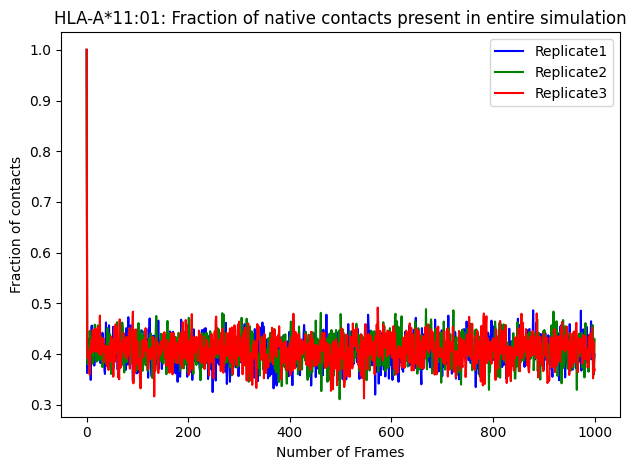

In [46]:
plt.plot(frac_nc_repli1_df.Frame,frac_nc_repli1_df[ "Contacts from first frame"] ,color ='b',label = "Replicate1") #blue
plt.plot(frac_nc_repli2_df.Frame,frac_nc_repli2_df[ "Contacts from first frame"] ,color ='g',label = "Replicate2")#green
plt.plot(frac_nc_repli3_df.Frame,frac_nc_repli3_df[ "Contacts from first frame"] ,color ='r',label = "Replicate3")#red
#frac_nc_repli2_df.plot(x='Frame',color ='g')
#frac_nc_repli3_df.plot(x='Frame')
plt.ylabel('Fraction of contacts')
plt.xlabel("Number of Frames")
plt.title("HLA-A*11:01: Fraction of native contacts present in entire simulation")
plt.legend()

plt.tight_layout()
##########################
plt.savefig("a1101_replicates_fract_native_contact")
plt.show()
#plt.legend()

# Pairwise RMSD
https://userguide.mdanalysis.org/stable/examples/analysis/alignment_and_rms/pairwise_rmsd.html

In [65]:
from MDAnalysis.analysis import diffusionmap, align, rms

### Using the pre-aligned trajectories from RMSF analysis

In [70]:
matrix_a1101_repli1 = diffusionmap.DistanceMatrix(a1101_repli1_aligned, select='name CA').run(verbose = True)

  0%|          | 0/1001 [00:00<?, ?it/s]

In [76]:
#type(matrix_a1101_repli1.results.dist_matrix)

In [77]:
matrix_a1101_repli2= diffusionmap.DistanceMatrix(a1101_repli2_aligned, select='name CA').run(verbose = True)

  0%|          | 0/1001 [00:00<?, ?it/s]

In [79]:
matrix_a1101_repli3 = diffusionmap.DistanceMatrix(a1101_repli3_aligned, select='name CA').run(verbose = True)

  0%|          | 0/1001 [00:00<?, ?it/s]

### Saving the generated matrix to convert to dataframe and then in csv files so I don't have to re-calculate

In [80]:
a1101_repli1_pair_RMSD_df = pd.DataFrame(matrix_a1101_repli1.results.dist_matrix)
a1101_repli1_pair_RMSD_df.to_csv("a1101_repli1_pair_RMSD_df.csv")
a1101_repli2_pair_RMSD_df = pd.DataFrame(matrix_a1101_repli2.results.dist_matrix)
a1101_repli2_pair_RMSD_df.to_csv("a1101_repli2_pair_RMSD_df.csv")
a1101_repli3_pair_RMSD_df = pd.DataFrame(matrix_a1101_repli3.results.dist_matrix)
a1101_repli3_pair_RMSD_df.to_csv("a1101_repli3_pair_RMSD_df.csv")

### Loading from saved csv files, want to replot to make the three plots in a column instead of row for easy reading

In [19]:

a1101_repli1_pair_RMSD_df=pd.read_csv("a1101_repli1_pair_RMSD_df.csv",index_col=False) # otherwise an unamed :0 index column comes in plots

a1101_repli2_pair_RMSD_df=pd.read_csv("a1101_repli2_pair_RMSD_df.csv",index_col=False)

a1101_repli3_pair_RMSD_df=pd.read_csv("a1101_repli3_pair_RMSD_df.csv",index_col=False)

In [20]:
a1101_repli1_pair_RMSD_df = a1101_repli1_pair_RMSD_df.drop('Unnamed: 0', axis=1)# otherwise an unamed :0 index column comes in plots
a1101_repli2_pair_RMSD_df = a1101_repli2_pair_RMSD_df.drop('Unnamed: 0', axis=1)
a1101_repli3_pair_RMSD_df = a1101_repli3_pair_RMSD_df.drop('Unnamed: 0', axis=1)

In [ ]:
### Plotting Pairwise RMSD
#Plot code from notebook: trajectory_analysis_31_1_24.ipynb

In [21]:
a1101_repli1_pair_RMSD_df.head()

0         1         2         3         4         5         6  \
0  0.000000  0.227738  0.227793  0.222308  0.227212  0.223715  0.227682   
1  0.227738  0.000000  0.270564  0.266452  0.271386  0.272658  0.271828   
2  0.227793  0.270564  0.000000  0.258838  0.268322  0.270340  0.274129   
3  0.222308  0.266452  0.258838  0.000000  0.272403  0.267384  0.264166   
4  0.227212  0.271386  0.268322  0.272403  0.000000  0.264718  0.277001   

          7         8         9  ...       991       992       993       994  \
0  0.226539  0.224029  0.234699  ...  0.224138  0.226942  0.228123  0.225411   
1  0.272806  0.272757  0.282363  ...  0.269149  0.271986  0.277510  0.271296   
2  0.273246  0.262688  0.278578  ...  0.266840  0.265231  0.271494  0.268180   
3  0.269403  0.259748  0.270892  ...  0.269619  0.275802  0.270728  0.266385   
4  0.283805  0.275621  0.287924  ...  0.279083  0.280685  0.277254  0.279997   

        995       996       997       998       999      1000  
0  0.240124  0.238753  0.230503  0.222574  0.227692  0.231943  
1  0.284605  0.270637  0.274475  0.267389  0.272800  0.275994  
2  0.275405  0.271612  0.280869  0.273555  0.272565  0.275377  
3  0.273843  0.269977  0.270444  0.270998  0.260942  0.270142  
4  0.285001  0.290010  0.277475  0.273980  0.275631  0.285761  

[5 rows x 1001 columns]

<Axes: >

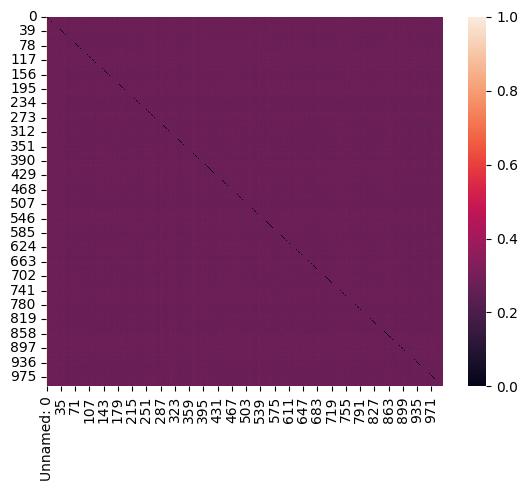

In [9]:
sns.heatmap(a1101_repli1_pair_RMSD_df,vmin =0, vmax = 1)

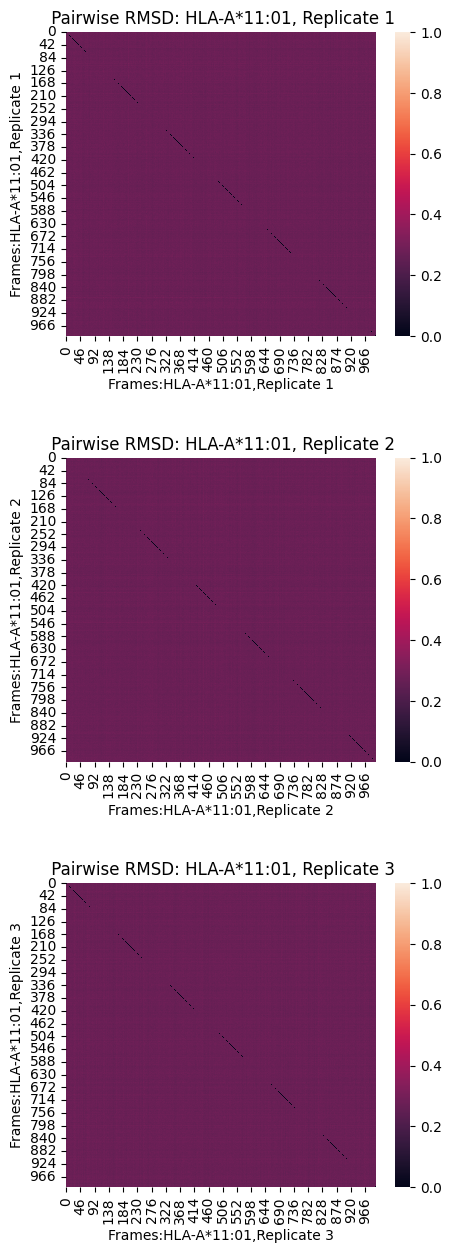

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize =(5,15))
#creating axis for placing color bar,separate axis for colorbar otherwise it takes space from plot
#cbar_ax = fig.add_axes([.91, .15, .03, .7]) # https://stackoverflow.com/questions/28356359/one-colorbar-for-seaborn-heatmaps-in-subplot
##heatmaps from distance matrix
#A1101: Repli1,2,3
sns.heatmap(a1101_repli1_pair_RMSD_df, ax =ax1,vmin =0, vmax = 1) 
sns.heatmap(a1101_repli2_pair_RMSD_df, ax =ax2,vmin =0, vmax = 1)
sns.heatmap(a1101_repli3_pair_RMSD_df, ax =ax3,vmin =0, vmax = 1)


#adding a limit so the axis labels show the mamximum atoms on each side
#ylim = len([:,0]) # column 0, i.e. ab
#xlim = len(m[0]) # row 0, i.e. HLA #it is the same for HLA-A*11:01 and 02, I have checked
#print(ylim)
#print(xlim)
# add figure labels and titles per axis (not per plot using plt.xlabel)
#axis 1
ax1.set_ylabel('Frames:HLA-A*11:01,Replicate 1')
ax1.set_xlabel('Frames:HLA-A*11:01,Replicate 1')
ax1.set_title(" Pairwise RMSD: HLA-A*11:01, Replicate 1")
#ax1.set_xlim([0,xlim])
#ax1.set_ylim([0,ylim])
#axis 2
ax2.set_ylabel('Frames:HLA-A*11:01,Replicate 2')
ax2.set_xlabel('Frames:HLA-A*11:01,Replicate 2')
ax2.set_title(" Pairwise RMSD: HLA-A*11:01, Replicate 2")
#ax2.set_xlim([0,xlim])
#ax2.set_ylim([0,ylim])
#axis 3
ax3.set_ylabel('Frames:HLA-A*11:01,Replicate 3')
ax3.set_xlabel('Frames:HLA-A*11:01,Replicate 3')
ax3.set_title(" Pairwise RMSD: HLA-A*11:01, Replicate 3")
#ax3.set_xlim([0,xlim])
#ax3.set_ylim([0,ylim])

#ax.figure.colorbar(sm, cax=cax)
fig.subplots_adjust(wspace=0.4)
#fig.subplots_adjust(hspace=0.4)


#combined title
#plt.suptitle('Pairwise RMSD of HLA heavy atoms across trajectories')
#Adding a little space between subplots so the figures are displayed properly
plt.subplots_adjust(hspace=0.4)
#saving the figure
plt.savefig("pairwise_rmsd_a1101_replicates_02_06_24.png")
plt.show()


### Solvent Accessible Surface Area (SASA) calculations

#### bash commands

In [ ]:
gmx sasa -f a1101_repli1_shortened_pbc_ok.xtc -s a1101_md.tpr -n index.ndx -o sasa_total_a1101_repli1.xvg -odg sasa_over_time_a1101_repli1.xvg -or sasa_per_residue_a1101_repli1.xvg -q a1101_repli1_connolly_surface.pdb
gmx sasa -f a1101_repli2_shortened_pbc_ok.xtc -s a1101_md.tpr -n index.ndx -o sasa_total_a1101_repli2.xvg -odg sasa_over_time_a1101_repli2.xvg -or sasa_per_residue_a1101_repli2.xvg -q a1101_repli2_connolly_surface.pdb
gmx sasa -f a1101_repli3_shortened_pbc_ok.xtc -s a1101_md.tpr -n index.ndx -o sasa_total_a1101_repli3.xvg -odg sasa_over_time_a1101_repli3.xvg -or sasa_per_residue_a1101_repli3.xvg -q a1101_repli3_connolly_surface.pdb

### reading xvg files into x and y coordinates

In [24]:
x,y,pos1 = np.loadtxt("sasa_per_residue_a1101_repli1.xvg",comments=["#","@"],unpack=True)
x1,y1,pos2 = np.loadtxt("sasa_per_residue_a1101_repli2.xvg",comments=["#","@"],unpack=True)
x2,y2,pos3 = np.loadtxt("sasa_per_residue_a1101_repli3.xvg",comments=["#","@"],unpack=True)

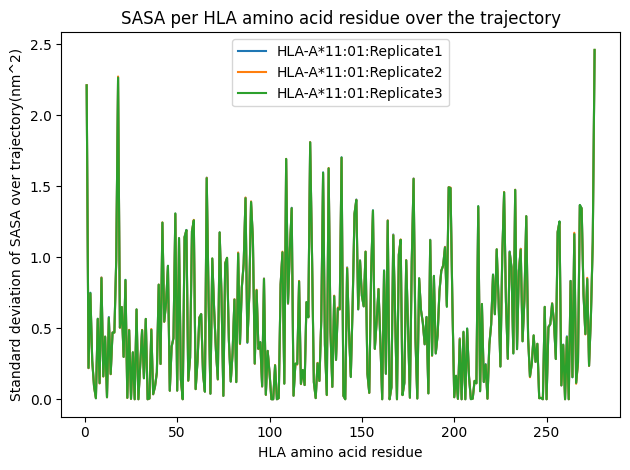

In [25]:
fig,ax1 = plt.subplots()
##first axis: residue numbers and area
ax1.plot(x,y)
ax1.plot(x1,y1)
ax1.plot(x2,y2)
ax1.set_xlabel("HLA amino acid residue")
ax1.set_ylabel("Standard deviation of SASA over trajectory(nm^2)")
ax1.legend(["HLA-A*11:01:Replicate1","HLA-A*11:01:Replicate2","HLA-A*11:01:Replicate3"])
##second axis: actual average SASA value per residue over the trajectory
#ax2.plot(x,pos1)
#ax2.plot(x1,pos2)
#ax2.plot(x2,pos3)
#ax2.set_xlabel("Residue")
#ax2.set_ylabel("Average SASA over trajectory(nm^2)")
#ax2.legend(["HLA-A*11:01:Replicate1","HLA-A*11:01:Replicate2","HLA-A*11:01:Replicate3"])
ax1.set_title("SASA per HLA amino acid residue over the trajectory")
#plt.suptitle("Area per HLA amino acid residue over the trajectory")
plt.tight_layout()
#plt.savefig("sasa_per_residue_over_time_a1101_replicates.png")
plt.show()

### Tanimoto similarity matrices from Interaction Fingerprint (IFP) objects: ProLIF package(https://prolif.readthedocs.io/en/stable/)

In [ ]:
entire_hla = ("resid 1:276")

In [ ]:
## Defining fingerprint object

In [2]:
hla_ab_fp = plf.Fingerprint( parameters={ "HBAcceptor": {"distance": 3.9,"DHA_angle":(90, 180)},
                                   "HBDonor": {"distance": 3.9,"DHA_angle":(90, 180)},
                                 "Cationic": {"distance": 4.0},
                                  "Anionic": {"distance": 4.0},
                                  },
           interactions = ['Anionic',
                     'CationPi',
                 'Cationic',
                 'EdgeToFace',
                 'FaceToFace',
                 'HBAcceptor',
                 'HBDonor',
                'Hydrophobic',
                 #'MetalAcceptor',
                 #'MetalDonor',
                 'PiCation',
                 'PiStacking',
                'VdWContact'
                 #'XBAcceptor',
                 #'XBDonor', 
                         ] , count=True
                    )

In [ ]:
# create selections for both protein components: HLA epitope residues and antibody 2e3
small_protein_selection = ("resid 15:20 or resid 40:41 or resid 91 or resid 311 or resid 313 or resid 322") #hla epitope residues
large_protein_selection = ("resid 377:819") #antibody 2e3

#### getting the atoms from universes

In [ ]:
#getting the atoms from universes
small_protein_selection_a1101_repli1 = a1101_repli1u.select_atoms(small_protein_selection)
large_protein_selection_a1101_repli1 = a1101_repli1u.select_atoms(large_protein_selection)

In [ ]:
small_protein_selection_a1101_repli2 = a1101_repli2u.select_atoms(small_protein_selection)
large_protein_selection_a1101_repli2 = a1101_repli2u.select_atoms(large_protein_selection)

In [ ]:
small_protein_selection_a1101_repli3 = a1101_repli3u.select_atoms(small_protein_selection)
large_protein_selection_a1101_repli3 = a1101_repli3u.select_atoms(large_protein_selection)

### Generating Interaction Fingerprints and converting them to dataframes for all three replicates

In [ ]:
#replicate1

In [ ]:
hla_ab_fp.run(a1101_repli1u.trajectory, small_protein_selection_a1101_repli1, large_protein_selection_a1101_repli1)

In [ ]:
hla_ab_fp.to_pickle("a1101_epitope_res_ab_trajectory_repli1_fingerprint.pkl")
a1101_repli1_fp = plf.Fingerprint.from_pickle("a1101_epitope_res_ab_trajectory_repli1_fingerprint.pkl")

In [ ]:
a1101_repli1df = a1101_repli1_fp.to_dataframe()
# show only the 3 first frames
a1101_repli1df.head(3)

In [ ]:
# replicate 2

In [ ]:
hla_ab_fp.run(a1101_repli2u.trajectory, small_protein_selection_a1101_repli2, large_protein_selection_a1101_repli2)

In [ ]:
hla_ab_fp.to_pickle("a1101_epitope_res_ab_trajectory_repli2_fingerprint.pkl")
a1101_repli2_fp = plf.Fingerprint.from_pickle("a1101_epitope_res_ab_trajectory_repli2_fingerprint.pkl")

In [ ]:
a1101_repli2df = a1101_repli2_fp.to_dataframe()
# show only the 3 first frames
a1101_repli2df.head(3)

In [ ]:
#replicate 3

In [ ]:
hla_ab_fp.run(a1101_repli3u.trajectory, small_protein_selection_a1101_repli3, large_protein_selection_a1101_repli3)

In [ ]:
hla_ab_fp.to_pickle("a1101_epitope_res_ab_trajectory_repli3_fingerprint.pkl")
a1101_repli3_fp = plf.Fingerprint.from_pickle("a1101_epitope_res_ab_trajectory_repli3_fingerprint.pkl")

In [ ]:
a1101_repli3df = a1101_repli3_fp.to_dataframe()
# show only the 3 first frames
a1101_repli3df.head(3)

In [3]:
#### just the fingerprint objects saved to csv files
a1101_repli1_fp = plf.Fingerprint.from_pickle("a1101_epitope_res_ab_trajectory_repli1_fingerprint.pkl")
a1101_repli1df = a1101_repli1_fp.to_dataframe()
a1101_repli2_fp = plf.Fingerprint.from_pickle("a1101_epitope_res_ab_trajectory_repli2_fingerprint.pkl")
a1101_repli2df = a1101_repli2_fp.to_dataframe()
a1101_repli3_fp = plf.Fingerprint.from_pickle("a1101_epitope_res_ab_trajectory_repli3_fingerprint.pkl")
a1101_repli3df = a1101_repli3_fp.to_dataframe()
###saving to csv
a1101_repli1df.to_csv("a1101_repli1df_fp_df.csv")
a1101_repli2df.to_csv("a1101_repli2df_fp_df.csv")
a1101_repli3df.to_csv("a1101_repli3df_fp_df.csv")

## Creating Tanimoto Similarity Matrices 

### Replicate 1

In [4]:
from rdkit import DataStructs

# Tanimoto similarity matrix
bitvectors_a1101_repli1 = a1101_repli1_fp.to_bitvectors()
similarity_matrix_a1101_repli1 = []
for bv in bitvectors_a1101_repli1:
    similarity_matrix_a1101_repli1.append(DataStructs.BulkTanimotoSimilarity(bv, bitvectors_a1101_repli1))
similarity_matrix_a1101_repli1 = pd.DataFrame(similarity_matrix_a1101_repli1, index=a1101_repli1df.index, columns=a1101_repli1df.index)
####saving to csv
similarity_matrix_a1101_repli1.to_csv("tanimoto_matrix_df_a1101_repli1.csv")

In [ ]:
### Replicate 2

In [5]:
bitvectors_a1101_repli2 = a1101_repli2_fp.to_bitvectors()
similarity_matrix_a1101_repli2 = []
for bv in bitvectors_a1101_repli2:
    similarity_matrix_a1101_repli2.append(DataStructs.BulkTanimotoSimilarity(bv, bitvectors_a1101_repli2))
similarity_matrix_a1101_repli2 = pd.DataFrame(similarity_matrix_a1101_repli2, index=a1101_repli2df.index, columns=a1101_repli2df.index)
similarity_matrix_a1101_repli2.to_csv("tanimoto_matrix_df_a1101_repli2.csv")

In [ ]:
### Replicate 3

In [6]:
bitvectors_a1101_repli3 = a1101_repli3_fp.to_bitvectors()
similarity_matrix_a1101_repli3 = []
for bv in bitvectors_a1101_repli3:
    similarity_matrix_a1101_repli3.append(DataStructs.BulkTanimotoSimilarity(bv, bitvectors_a1101_repli3))
similarity_matrix_a1101_repli3 = pd.DataFrame(similarity_matrix_a1101_repli3, index=a1101_repli3df.index, columns=a1101_repli3df.index)
similarity_matrix_a1101_repli3.to_csv("tanimoto_matrix_df_a1101_repli3.csv")

### Plotting the Tanimoto Similarity Matrices for three replicate trajectories

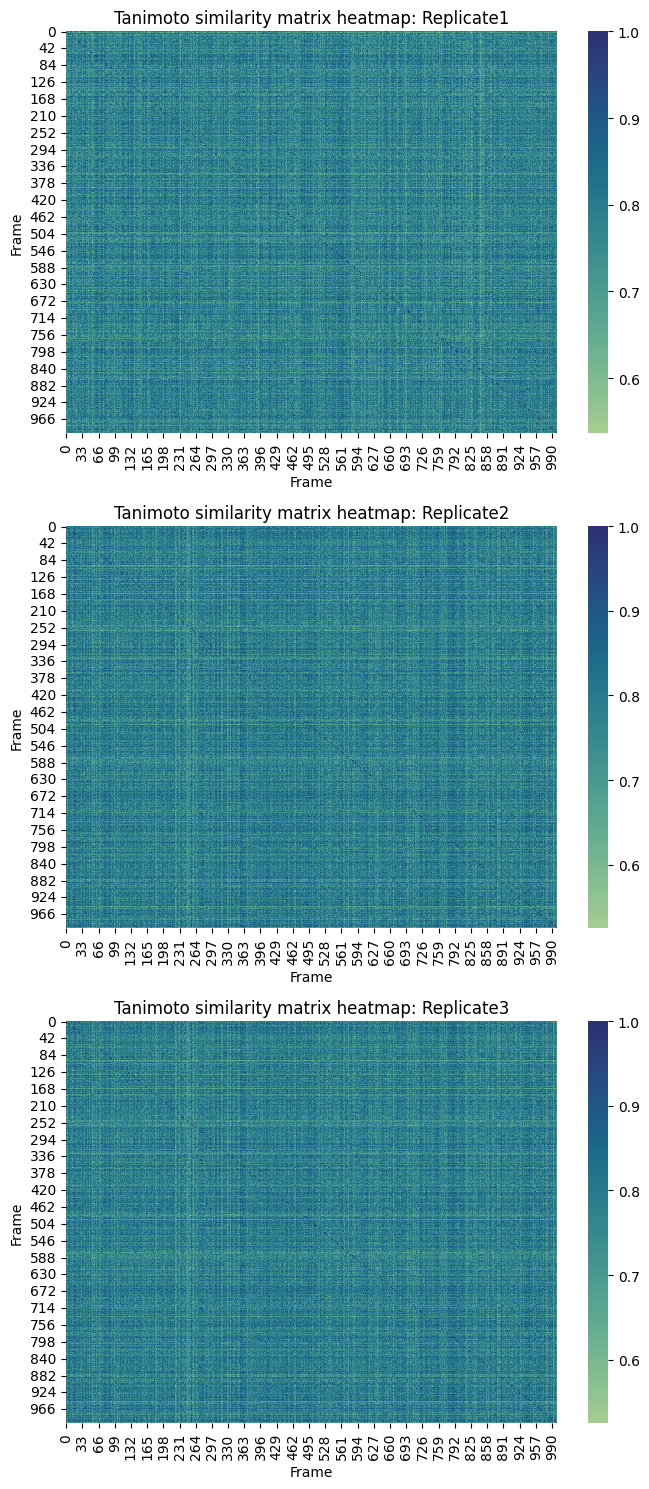

In [8]:
fig, ax = plt.subplots(3, 1,figsize=(7,15))
ax[0] = sns.heatmap(
    similarity_matrix_a1101_repli1,
    ax=ax[0],
    #square=True,
    cmap="crest")
ax[1] = sns.heatmap(
    similarity_matrix_a1101_repli2,
    ax=ax[1],
    #square=True,
    cmap="crest")
ax[2] = sns.heatmap(
    similarity_matrix_a1101_repli2,
    ax=ax[2],
    #square=True,
    cmap="crest")
#a1101_static = sns.barplot(a1101_hla_only, x="unique_protein_interface_res", y="NCI", hue="Surface_exposure",
  #                         palette ="Set2",legend=True)
#ax.tick_params(labelrotation = "horizontal")
#a1101_static.tight_layout()
##setting xlabel and y labels
#ax[0].set_ylabel("Number of Frames")
#ax[0].set_xlabel("HLA Epitope residues")
## setting title
ax[0].set_title("Tanimoto similarity matrix heatmap: Replicate1")
ax[1].set_title("Tanimoto similarity matrix heatmap: Replicate2")
ax[2].set_title("Tanimoto similarity matrix heatmap: Replicate3")
plt.tight_layout()
plt.savefig("tanimoto_matrix_a1101_replicates_longitudinal_02_06_24.png")

plt.show()

## Clustering Tanimoto Matrices and plotting clusters

In [ ]:
# Replicate 1

/home/sampurna/anaconda3/envs/prolif/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/sampurna/anaconda3/envs/prolif/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


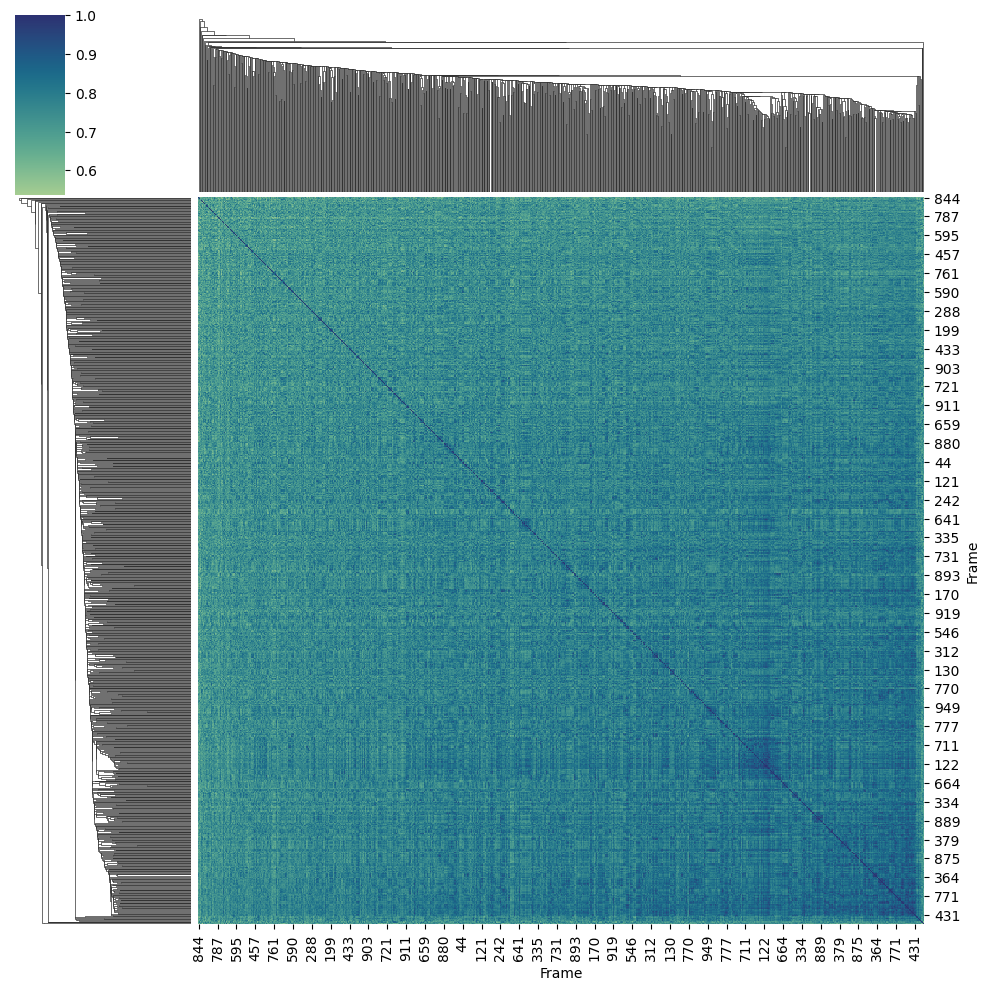

In [9]:
ax1 = sns.clustermap(similarity_matrix_a1101_repli1,method="single",cmap="crest")
plt.savefig("tanimoto_matrix_clustered_a1101_repli1.png")

In [ ]:
# Replicate 2

/home/sampurna/anaconda3/envs/prolif/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/sampurna/anaconda3/envs/prolif/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


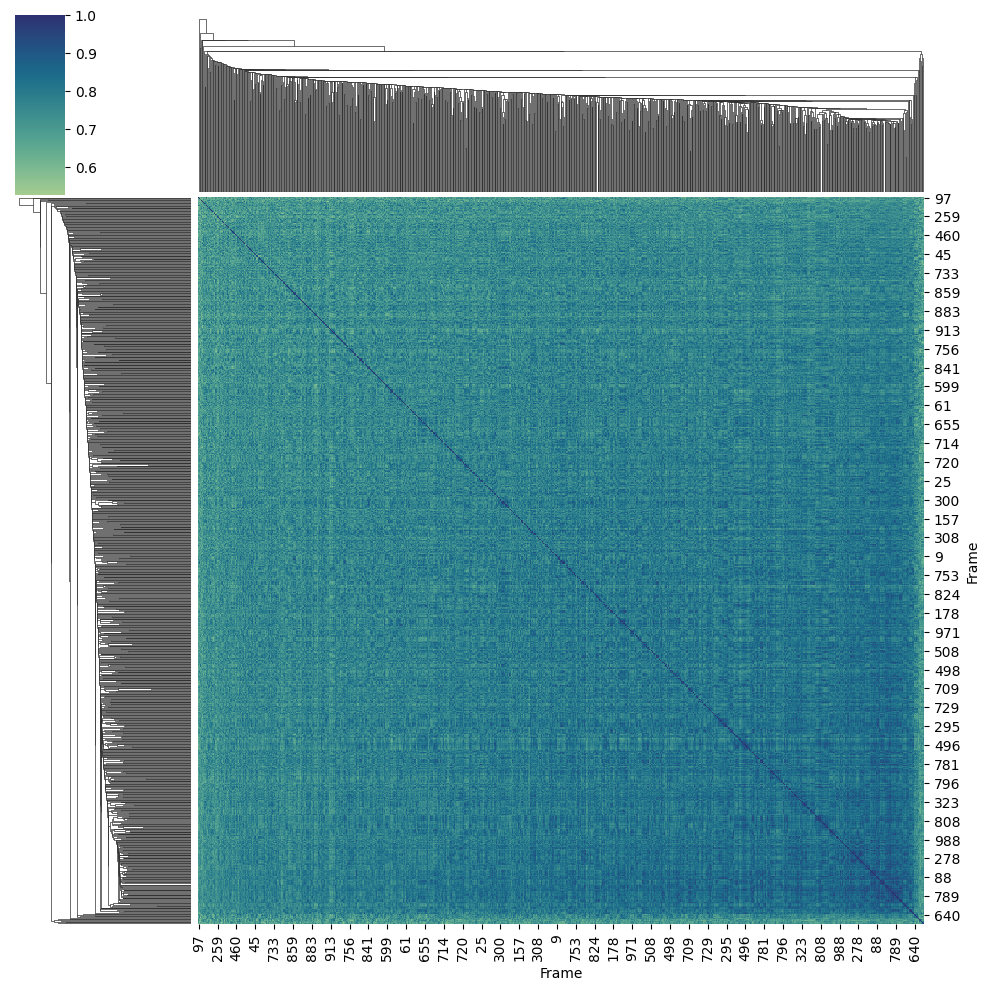

In [10]:
ax2 = sns.clustermap(similarity_matrix_a1101_repli2,method="single",cmap="crest")
plt.savefig("tanimoto_matrix_clustered_a1101_repli2.png")

In [ ]:
# Replicate 3

/home/sampurna/anaconda3/envs/prolif/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/sampurna/anaconda3/envs/prolif/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


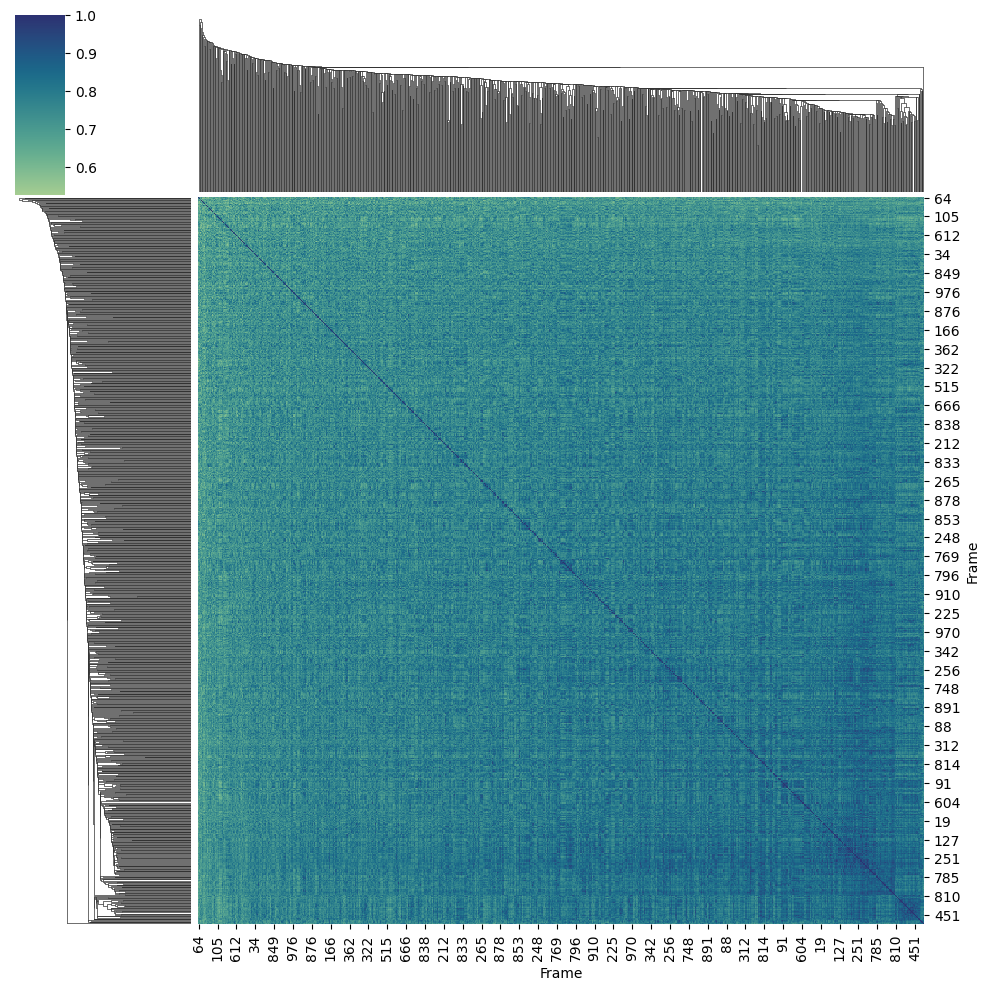

In [11]:
ax3 = sns.clustermap(similarity_matrix_a1101_repli3,method="single",cmap="crest")
plt.savefig("tanimoto_matrix_clustered_a1101_repli3.png")